<a href="https://colab.research.google.com/github/deepak3081996/MurdersPerAnnumPredictions/blob/master/MurdersPerAnnumPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the datasets

In [0]:
import bs4 as bs
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Fetching the data
### Reading data from the source url

In [0]:
source = urllib.request.urlopen(r'https://people.sc.fsu.edu/~jburkardt/datasets/regression/x08.txt').read()

soup = bs.BeautifulSoup(source, 'lxml')

lines = soup.p.contents[0].split('\n')

### Removing the empty lines from the fetched data

In [0]:
try:
    for line in lines[-1::-1]:
        if line == '':
            lines.pop()
except:
    pass

### Creating the dataset 

In [28]:
l1 = []
noOfColumns = 0
noOfRows = 0
for line in lines:
  
    if line[0] == '#':    # avoiding all the lines stating with '#' character
        print(line)
        continue

    if line[0] != '#' and (noOfColumns==0 or noOfRows==0):    # fetching the number of rows and columns
        datalist = line.split(' ')

        if datalist[1] == 'columns':
            noOfColumns = int(datalist[0])
            col = 0

        elif datalist[1] == 'rows':
            noOfRows = int(datalist[0])
            row = 0

    elif line[0] != '#' and noOfColumns>0 and noOfRows>0:    # fetfching all the rows and columns in 1-dimentional array as a list
        datalist = line.strip().split()

        if col<noOfColumns:
            l1.append(' '.join(datalist))
            col += 1

        elif row<noOfRows:
            l1 += datalist
            row += 1
            
dataset = np.array([l1]).reshape((noOfRows+1,noOfColumns))    # Creating the dataset from the of shape(rows, columns) from the 1-D array with the coumns headers

#  x08.txt
#
#  Reference:
#
#    Helmut Spaeth,
#    Mathematical Algorithms for Linear Regression,
#    Academic Press, 1991,
#    ISBN 0-12-656460-4.
#
#    D G Kleinbaum and L L Kupper,
#    Applied Regression Analysis and Other Multivariable Methods,
#    Duxbury Press, 1978, page 150.
#
#  Discussion:
#
#    Measurements were made of poverty, unemployment, and murder rates.
#
#    There are 20 rows of data.  The data include:
#
#      I,  the index,
#      A1, the inhabitants, 
#      A2, the percentage of families incomes below $5000,
#      A3, the percentage unemployed,
#      B,  the number of murders per 1,000,000 inhabitants per annum.
#
#    We seek a model of the form:
#
#      B = A1 * X1 + A2 * X2 + A3 * X3
#


### Printing the Dataset

In [29]:
print(dataset)

[['Index' 'Inhabitants' 'Percent with incomes below $5000'
  'Percent unemployed' 'Murders per annum per 1,000,000 inhabitants']
 ['1' '587000' '16.5' '6.2' '11.2']
 ['2' '643000' '20.5' '6.4' '13.4']
 ['3' '635000' '26.3' '9.3' '40.7']
 ['4' '692000' '16.5' '5.3' '5.3']
 ['5' '1248000' '19.2' '7.3' '24.8']
 ['6' '643000' '16.5' '5.9' '12.7']
 ['7' '1964000' '20.2' '6.4' '20.9']
 ['8' '1531000' '21.3' '7.6' '35.7']
 ['9' '713000' '17.2' '4.9' '8.7']
 ['10' '749000' '14.3' '6.4' '9.6']
 ['11' '7895000' '18.1' '6.0' '14.5']
 ['12' '762000' '23.1' '7.4' '26.9']
 ['13' '2793000' '19.1' '5.8' '15.7']
 ['14' '741000' '24.7' '8.6' '36.2']
 ['15' '625000' '18.6' '6.5' '18.1']
 ['16' '854000' '24.9' '8.3' '28.9']
 ['17' '716000' '17.9' '6.7' '14.9']
 ['18' '921000' '22.4' '8.6' '25.8']
 ['19' '595000' '20.2' '8.4' '21.7']
 ['20' '3353000' '16.9' '6.7' '25.7']]


### Converting ratios and precentages into exact population

In [0]:
dataset[1:, 2] = dataset[1:, 2].astype('float')*dataset[1:, 1].astype('float')/100.00
dataset[1:, 3] = dataset[1:, 3].astype('float')*dataset[1:, 1].astype('float')/100.00
dataset[1:, 4] = dataset[1:, 4].astype('float')*dataset[1:, 1].astype('float')/1000000
dataset[0, 2:] = np.array(['Inhabitants with income below $5000','Inhabitants unemployed', 'Murders Per annum'])

### Printing the Dataset

In [31]:
print(dataset)

[['Index' 'Inhabitants' 'Inhabitants with income below $5000'
  'Inhabitants unemployed' 'Murders Per annum']
 ['1' '587000' '96855.0' '36394.0' '6.5744']
 ['2' '643000' '131815.0' '41152.0' '8.6162']
 ['3' '635000' '167005.0' '59055.0' '25.8445']
 ['4' '692000' '114180.0' '36676.0' '3.6676']
 ['5' '1248000' '239616.0' '91104.0' '30.9504']
 ['6' '643000' '106095.0' '37937.0' '8.1661']
 ['7' '1964000' '396728.0' '125696.0' '41.0476']
 ['8' '1531000' '326103.0' '116356.0' '54.65670000000001']
 ['9' '713000' '122636.0' '34937.00000000001' '6.203099999999999']
 ['10' '749000' '107107.0' '47936.0' '7.1904']
 ['11' '7895000' '1428995.0' '473700.0' '114.4775']
 ['12' '762000' '176022.0' '56388.0' '20.4978']
 ['13' '2793000' '533463.0000000001' '161994.0' '43.8501']
 ['14' '741000' '183027.0' '63726.0' '26.824200000000005']
 ['15' '625000' '116250.0' '40625.0' '11.3125']
 ['16' '854000' '212646.0' '70882.00000000001' '24.6806']
 ['17' '716000' '128163.99999999999' '47972.0' '10.6684']
 ['18' '

### creating a pandas dataframe

In [0]:
df = pd.DataFrame(data=dataset[1:,1:],    # selecting all the rows and columns starting from 1st index location i.e. 2nd row and 2nd column as the data
                 index=dataset[1:,0],     # 1st column of the dataset is the index and the rows starting from 1st index location
                 columns=dataset[0,1:],   # ist row of the dataset is the column names it's the 0th row of the dataset
                 dtype = 'float64')


### Printing the dataframe

In [35]:
pd.options.display.max_rows = 10
pd.options.display.max_columns = 5
pd.options.display.float_format = '{:.1f}'.format
print(df)

    Inhabitants  Inhabitants with income below $5000  Inhabitants unemployed  \
1      587000.0                              96855.0                 36394.0   
2      643000.0                             131815.0                 41152.0   
3      635000.0                             167005.0                 59055.0   
4      692000.0                             114180.0                 36676.0   
5     1248000.0                             239616.0                 91104.0   
..          ...                                  ...                     ...   
16     854000.0                             212646.0                 70882.0   
17     716000.0                             128164.0                 47972.0   
18     921000.0                             206304.0                 79206.0   
19     595000.0                             120190.0                 49980.0   
20    3353000.0                             566657.0                224651.0   

    Murders Per annum  
1              

### Describing the data

In [37]:
df.describe()

,Inhabitants,Inhabitants with income below $5000,Inhabitants unemployed,Murders Per annum
count,20.0,20.0,20.0,20.0
mean,1433000.0,273992.9,94818.4,28.4
std,1703726.2,305176.3,101754.6,28.7
min,587000.0,96855.0,34937.0,3.7
25%,643000.0,119205.0,41020.2,8.5
50%,745000.0,171513.5,57721.5,22.1
75%,1318750.0,261237.8,97417.0,33.5
max,7895000.0,1428995.0,473700.0,114.5


## Feature Selection
### fetching the Independent Variables and Dependent Variable

In [0]:
X = df.iloc[:,:3].values
y = df.iloc[:,3:].values

### splitting the data into training set and testing set

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scalling

In [0]:
from  sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

sc_y = StandardScaler()
y_train_scaled = sc_y.fit_transform(y_train)
y_test_scaled = sc_y.transform(y_test)

### Since the above data frame contains 2 independent variables therefore the model need to be implemented is multi linear regression
### the equation of mult linear regression is :
###               y = a0 + a1*x1 + a2*x2 + ..... +an*xn
### the model required in the above the dataset seek to be in the form of:
###               y = a1*x1 + a2*x2 + a3*x3
### thereby multi linear regression model hold the above required

## Fitting the Multi Linear Regression model to the dataset

In [53]:
from  sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predicting the test set results

In [0]:
y_pred = linear_regressor.predict(X_test_scaled)

In [55]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
print(r2_score(y_test, sc_y.inverse_transform(y_pred)))
print(mean_absolute_error(y_test, sc_y.inverse_transform(y_pred)))
print(mean_squared_error(y_test, sc_y.inverse_transform(y_pred)))

0.14403121539891717
6.033286492053988
59.68822722076112


## Visualising the results
### Visualising the training set results

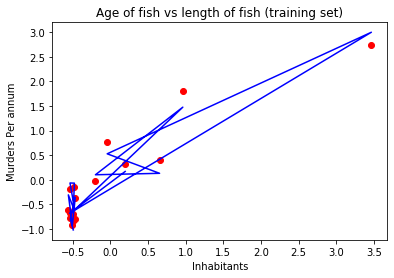

In [56]:
plt.scatter(X_train_scaled[:,0], y_train_scaled, color='red')
plt.plot(X_train_scaled[:,0], linear_regressor.predict(X_train_scaled), color='blue')
plt.title('Age of fish vs length of fish (training set)')
plt.xlabel('{}'.format(df.columns[0]))
plt.ylabel('{}'.format(df.columns[-1]))
plt.show()

### Visualising using 3d graphs

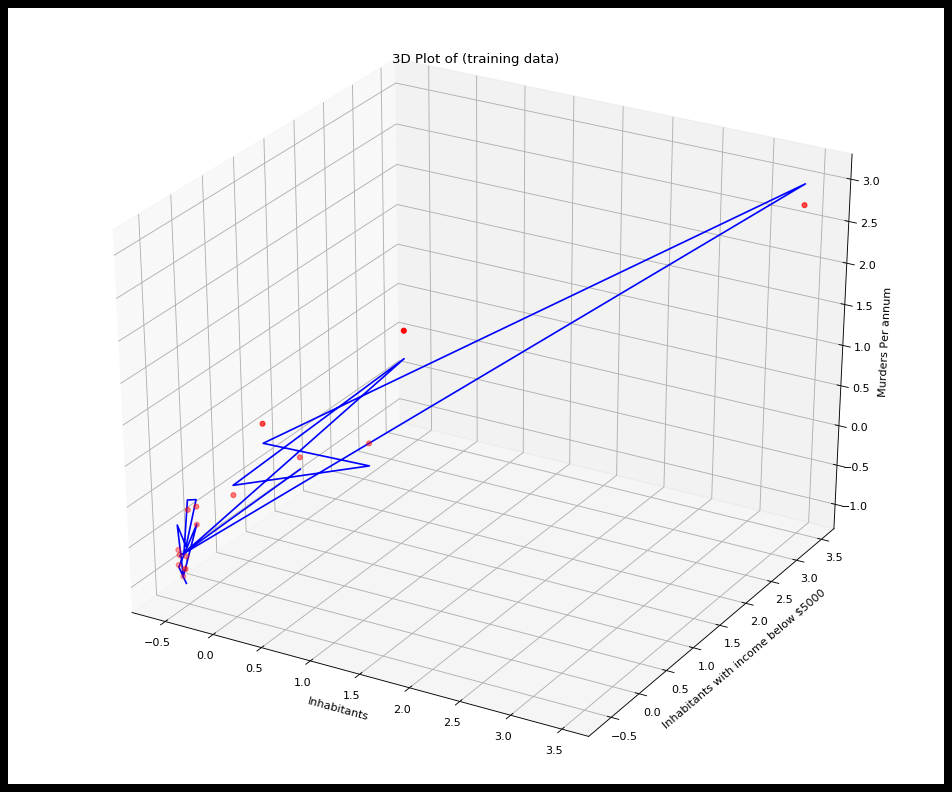

In [57]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize=(12, 10), dpi= 80, facecolor='k', edgecolor='k')
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(X_train_scaled[:,0], X_train_scaled[:,1], y_train_scaled, color='red', marker='o')
ax.plot(X_train_scaled[:,0].flatten(), X_train_scaled[:, 1].flatten(), linear_regressor.predict(X_train_scaled).flatten(), color='blue')

ax.set_xlabel('{}'.format(df.columns[0]))
ax.set_ylabel('{}'.format(df.columns[1]))
ax.set_zlabel('{}'.format(df.columns[-1]))
plt.title("3D Plot of (training data)")
plt.tight_layout()
plt.show()

### Visualizing the test set results

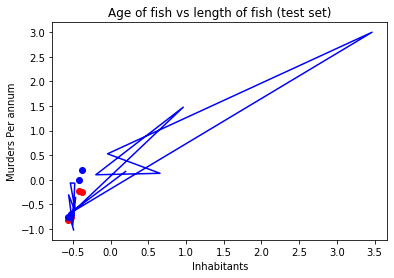

In [67]:
plt.scatter(X_test_scaled[:,0], y_test_scaled, color='red')
plt.scatter(X_test_scaled[:,0], y_pred, color='blue')
plt.plot(X_train_scaled[:,0], linear_regressor.predict(X_train_scaled), color='blue')
plt.title('Age of fish vs length of fish (test set)')
plt.xlabel('{}'.format(df.columns[0]))
plt.ylabel('{}'.format(df.columns[-1]))
plt.show()

### Visualising using 3d graphs

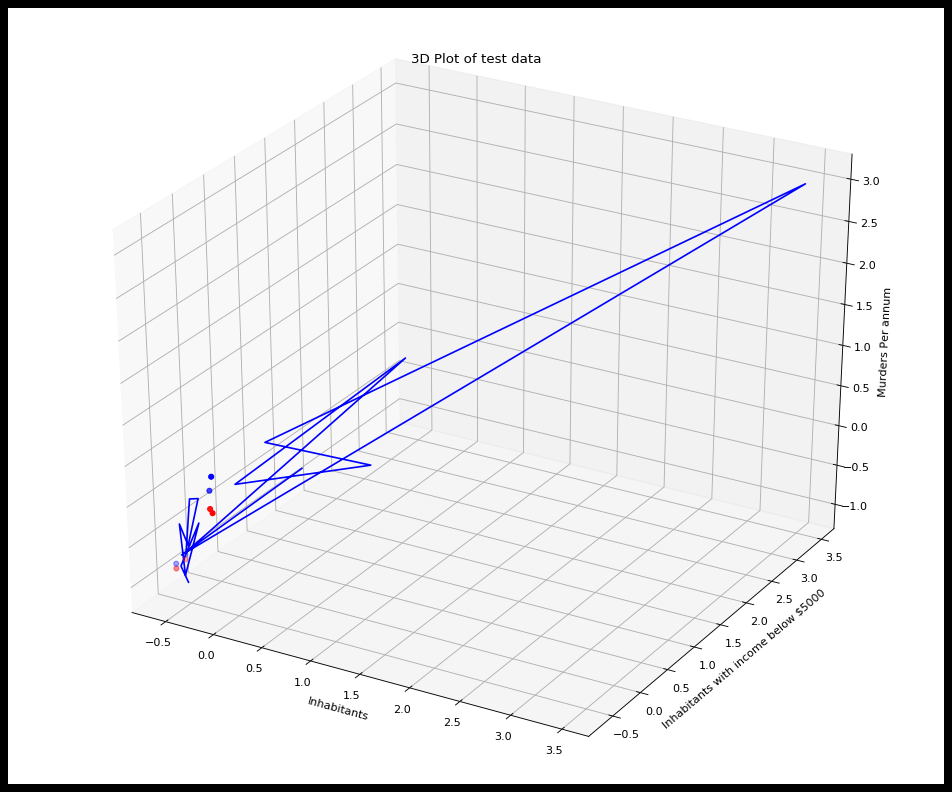

In [65]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize=(12, 10), dpi= 80, facecolor='k', edgecolor='k')
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], y_test_scaled, color='red', marker='o')
ax.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], y_pred, color='blue', marker='o')
ax.plot(X_train_scaled[:,0].flatten(), X_train_scaled[:, 1].flatten(), linear_regressor.predict(X_train_scaled).flatten(), color='blue')

ax.set_xlabel('{}'.format(df.columns[0]))
ax.set_ylabel('{}'.format(df.columns[1]))
ax.set_zlabel('{}'.format(df.columns[-1]))
plt.title("3D Plot of test data")
plt.tight_layout()
plt.show()
